In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
input_fn = './scores/scores:1.csv'

In [3]:
df = pd.read_csv(input_fn, header=[0])
df.columns = ['group', 'watermark', 'used?', 'loss']
df.head(1)

,group,watermark,used?,loss
0,0,= Valkyria Chronicles III = \n Senjō no Valky...,False,5.621094


In [4]:
for i, g in df.groupby('group'):
    test_statistic = g.iloc[0]['loss']
    samples = g.iloc[1:]
    p = np.mean(samples.loss > test_statistic)
    print(i, p, len(samples), samples.loss.mean() == test_statistic, len(g.iloc[0]['watermark']))

0 0.9696969696969697 99 False 20908
1 0.91 100 False 21487
2 0.56 100 False 16161
3 0.83 100 False 3667
4 0.69 100 False 6967
5 0.92 100 False 17813
13 0.86 100 False 8582
14 0.66 100 False 4915
15 0.17 100 False 2981
16 0.97 100 False 14842
17 0.93 100 False 14228
18 0.92 100 False 12193
19 0.87 100 False 6010
20 1.0 100 False 55982
21 0.96 100 False 13192
22 0.8 100 False 37173
23 0.56 100 False 11058
24 0.74 100 False 7686
25 0.92 100 False 25354
27 0.85 100 False 14778
28 0.73 100 False 30025
29 0.93 100 False 20621
30 0.28 100 False 29044
32 0.42 100 False 34415
33 0.88 100 False 29005
34 0.94 100 False 12853
35 0.79 100 False 6551
36 0.94 100 False 12323
37 1.0 100 False 7567
38 0.9 100 False 51477
39 0.91 100 False 47831
40 0.98 100 False 5656
41 0.96 100 False 23590
42 1.0 100 False 39665
43 0.54 100 False 7320
44 0.86 100 False 10954
45 0.99 100 False 11512
46 0.94 100 False 28822
47 0.28 100 False 11030
48 0.48 100 False 32988
49 0.97 100 False 10653
50 0.84 100 False 25080
5

In [5]:
test_statistic = df[df['used?']]['loss'].mean()
test_statistic

5.034993489583333

In [6]:
samples = []
null = df
for i in range(1, 100):
    samples.append(null.iloc[range(i,len(null),101)]['loss'].mean())

In [7]:
z_score = (test_statistic - np.mean(samples)) / np.std(samples)
z_score

-3.1965431911581708

In [8]:
print(np.sum(np.array(samples) > test_statistic))

99


/home/johnny/.conda/envs/torch/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


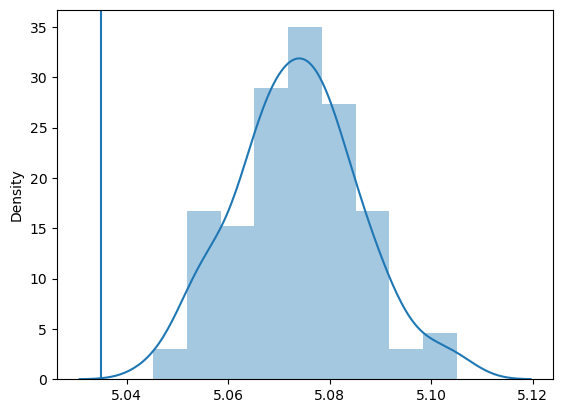

In [9]:
sns.distplot(samples)
plt.axvline(test_statistic)